## SKLEARN - FEATURES SELECTION

## SELECTION DE VARIABLES BASEE SUR TRANSFORMEUR

### EX : TRANSFORMEUR VarianceThreshold

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# chargement librairie VarianceThresold
from sklearn.feature_selection import VarianceThreshold

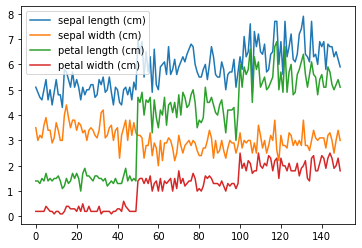

In [5]:
# Chargement du dataset des fleurs d'iris
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

plt.plot(X)
plt.legend(iris.feature_names)
plt.show()
# certaines variables varient beaucoup : pétales length en vert
# d'autres beaucoup moins : sepal width en orange

In [6]:
# utiliser le transformeur VarianceThreshold pour éliminer la variable
# orange sepal width si toutefois elle est inférieure au seuil de variance 
# qu'on définit

In [8]:
#  calcul des variances de tous les signaux
X.var(axis=0)
# variance de sepal length puis width...

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [10]:
#  création du transformeur selector avec seuil threshold 0.2
# pour éliminer la variables 2 orange
selector = VarianceThreshold(threshold=0.2)
selector.fit_transform(X)
#  la colonne orange a été filtrée, plus que 3 colonnes

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1],
       [5.4, 1.5, 0.2],
       [4.8, 1.6, 0.2],
       [4.8, 1.4, 0.1],
       [4.3, 1.1, 0.1],
       [5.8, 1.2, 0.2],
       [5.7, 1.5, 0.4],
       [5.4, 1.3, 0.4],
       [5.1, 1.4, 0.3],
       [5.7, 1.7, 0.3],
       [5.1, 1.5, 0.3],
       [5.4, 1.7, 0.2],
       [5.1, 1.5, 0.4],
       [4.6, 1. , 0.2],
       [5.1, 1.7, 0.5],
       [4.8, 1.9, 0.2],
       [5. , 1.6, 0.2],
       [5. , 1.6, 0.4],
       [5.2, 1.5, 0.2],
       [5.2, 1.4, 0.2],
       [4.7, 1.6, 0.2],
       [4.8, 1.6, 0.2],
       [5.4, 1.5, 0.4],
       [5.2, 1.5, 0.1],
       [5.5, 1.4, 0.2],
       [4.9, 1.5, 0.2],
       [5. , 1.2, 0.2],
       [5.5, 1.3, 0.2],
       [4.9, 1.4, 0.1],
       [4.4, 1.3, 0.2],
       [5.1, 1.5, 0.2],
       [5. , 1.3, 0.3],
       [4.5, 1.3

In [11]:
# pas très visible dans le tableau mais get_support retourne un tableau 
# numpy rempli de booleens permettant de savoir quelles sont les variables 
# sélectionnées
selector.get_support()

array([ True, False,  True,  True])

In [12]:
# on peut se servir de ce masque pour faire du boolean indexing
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
# nom de toutes les variables dans le dataset
# pour connaitre le nom des variables qui ne sont pas éliminées
# utiliser le masque sur la liste des noms transformée en tableau numpy
np.array(iris.feature_names)[selector.get_support()]

array(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'],
      dtype='<U17')

## SELECTION DE VARIABLES BASEE SUR TESTS DE DEPENDANCE

### Ex : TRANSFORMEUR test de chi2

In [16]:
from sklearn.feature_selection import SelectKBest, chi2

In [17]:
# quand on utilise chi2 dans lequel on fait passer X et y
# cela retourne 2 tableaux numpy
chi2(X, y)
# tableau 1 : le score du test chi2 scorestatistics - 
# plus élevé plus uil y a une dépendance entre notre variable dans X
# avec notre variable dans y (y dépendant beaucoup de v3ième valeurs)
# tableau 2 : les p-values les valeurs de probabilités

(array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ]),
 array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15]))

### Ex : TRANSFORMEUR SelectKBest

In [22]:
# transformeur SelectKBest : sélectionner les variables dont le
# score statistiques donc la valeur du premier tableau est la plus élevée

# avec k=1 et test de chi2
selector = SelectKBest(chi2, k=1)
selector.fit_transform(X, y)
# ne retourne qu'une seule variable ==> c'est la troisième varaible
# du dataset

array([[1.4],
       [1.4],
       [1.3],
       [1.5],
       [1.4],
       [1.7],
       [1.4],
       [1.5],
       [1.4],
       [1.5],
       [1.5],
       [1.6],
       [1.4],
       [1.1],
       [1.2],
       [1.5],
       [1.3],
       [1.4],
       [1.7],
       [1.5],
       [1.7],
       [1.5],
       [1. ],
       [1.7],
       [1.9],
       [1.6],
       [1.6],
       [1.5],
       [1.4],
       [1.6],
       [1.6],
       [1.5],
       [1.5],
       [1.4],
       [1.5],
       [1.2],
       [1.3],
       [1.4],
       [1.3],
       [1.5],
       [1.3],
       [1.3],
       [1.3],
       [1.6],
       [1.9],
       [1.4],
       [1.6],
       [1.4],
       [1.5],
       [1.4],
       [4.7],
       [4.5],
       [4.9],
       [4. ],
       [4.6],
       [4.5],
       [4.7],
       [3.3],
       [4.6],
       [3.9],
       [3.5],
       [4.2],
       [4. ],
       [4.7],
       [3.6],
       [4.4],
       [4.5],
       [4.1],
       [4.5],
       [3.9],
       [4.8],
      

In [23]:
# pour trouver le nom de la variable 
np.array(iris.feature_names)[selector.get_support()]

array(['petal length (cm)'], dtype='<U17')

In [25]:
# avec k=2 et test de chi2 ==< identique au test de chi2
selector = SelectKBest(chi2, k=2)
selector.fit_transform(X, y)
selector.get_support()

array([False, False,  True,  True])

In [26]:
np.array(iris.feature_names)[selector.get_support()]

array(['petal length (cm)', 'petal width (cm)'], dtype='<U17')

In [28]:
# on peut modifier le test chi2 en annova.. 
# à adapter en fonction du problème qu'on a à traiter
# choisir quel transformeur...

In [29]:
# Autre transformeur SelectPercentile qui va conserver toutes les variables
# au dessus d'un certain pourcentage de scores
# sélection les variables selon leur p-values...

## SELECTION DE VARIABLES BASEE SUR LES COEFFICIENTS

### Ex : TRANSFORMEUR SelectFromModel

In [30]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import SGDClassifier

In [32]:
# on utilise le transformeurSelectFromModel avec l'estimateur
# un estimateur par ex SGDClassifier entraîné sur X et y
# donc il développe les coefficients et pour sélectionner les variables
# les plus importantes, il va falloir utiliser un thresHold en utilisant 
# les coeff sup à une moyenne...
selector = SelectFromModel(SGDClassifier(random_state=0), threshold='mean')
#  on developpe le transformeur en passant X,y car estimateur a besoin de
# x et y
selector.fit_transform(X, y)
# 2 variables sélectionnées sur les 4

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [33]:
np.array(iris.feature_names)[selector.get_support()]

array(['petal length (cm)', 'petal width (cm)'], dtype='<U17')

In [34]:
# voir quels sont les coef trouvés par SGDClassifier?
# utiliser l'estimateur intégré dans le transformeur SelectFromModel
selector.estimator_

SGDClassifier(random_state=0)

In [35]:
# pour trouver les coefs développés par SGDClassifier
selector.estimator_.coef_
#  les

array([[  8.64029104,  27.2851296 , -40.01819009, -17.73533424],
       [ -5.48888269, -58.79616709,  22.88584985, -54.14457159],
       [-81.28026953, -75.17372078, 130.76437145, 131.39608339]])

In [36]:
X.shape

(150, 4)

In [37]:
y.shape

(150,)

In [38]:
# mais 3 classes dans y = setosa, versicolor, virginica
#  on se retrouve avec matrice 3*4
selector.estimator_.coef_.shape
# ==> colonnes = coefficients pour les différentes variables
# ==> lignes = coefficients pour chaque classe de y

(3, 4)

In [41]:
# transformeur SelectFromModel calcule la moyenne de toutes les colonnes
# 8.64, -5.48, -81.28 : ex 1ère colonne
selector.estimator_.coef_.mean(axis=0)

array([-26.04295373, -35.56158609,  37.87734374,  19.83872585])

In [43]:
# et il sélectionne les variables qui sont au dessus de la moyenne
# de toutes ces moyennes
selector.estimator_.coef_.mean(axis=0).mean()
# moyenne = -0.97 ==> sélect

-0.9721175565229512

## SELECTION DE VARIABLES BASEE SUR RECURRSIVITE

In [45]:
from sklearn.feature_selection import RFE, RFECV

In [48]:
# estimateur SGDClassifier, 
# step = nombre de variables à élimimer à chaque itération : 
# 1 (élimine une variable, 2 : 2 variables...)
# min_features_to_select =  indiquer combien de variables on veut 
# à la fin de l'algo récurrsif
# cv = nombre de split pour la cross-validation
selector = RFECV(SGDClassifier(), step=1, min_features_to_select=2, cv=5)
selector.fit(X, y) # ou fit_transform
# argument ranking : voir le classement final de nos variables
selector.ranking_
# 3 denrnières variables toutes la 1ère place et première rang 2 
# ==> éliminées

array([2, 1, 1, 1])

In [50]:
# autre argument : grid_scores_ : le score de SGDcClassifier 
# à chaque itération de notre RFECV
selector.grid_scores_    
# score de 80% à première itération, élimine 1 variable
# tour 2 score de 84% élimine la variable 
# mais itération 3 score plus petit ==> on n'élimine pas la variable

array([0.79333333, 0.86666667, 0.85333333])